### Task 2
Objective: Perform EDA to understand the dataset's structure and identify any anomalies or outliers.

Dataset: [Medical Cost Personal](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Tasks:

1. Data Exploration:

* Load the dataset and display the first few rows.
* Use descriptive statistics to summarize the data.

2. Outlier Detection:

* Identify outliers in numerical variables using one of provided methods.
* Discuss potential reasons for these outliers and how they might affect analysis.

3. Data Cleaning:

* Decide on strategies to handle missing values and outliers (e.g., imputation, removal).
* Justify your choices and implement the cleaning process.


***
## Dataset Overview: Medical Cost Personal
The dataset contains information about individuals’ personal and lifestyle factors, with a focus on their medical charges.  

### Key Features:

* **Age:** Age of the individual (in years)
* **Sex:** Gender of the individual (male/female)
* **BMI:** Body Mass Index, a measure of body fat based on height and weight
* **Children:** Number of children covered by health insurance
* **Smoker:** Whether the individual is a smoker (yes/no)
* **Region:** The individual's residential region in the US (northeast, southeast, southwest, northwest)
* **Charges:** The medical costs billed by health insurance (in USD)

## Import

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [66]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Descriptive Statistics

In [67]:
def get_feature_types(df):
    feature_types = {
        "numerical_features": df.select_dtypes(exclude=['object']).columns.tolist(),
        "categorical_features": df.select_dtypes(include=['object']).columns.tolist()
    }
    return feature_types

In [68]:
feature_types = get_feature_types(df)
print("Numerical Features:", feature_types["numerical_features"])
print("Categorical Features:", feature_types["categorical_features"])

Numerical Features: ['age', 'bmi', 'children', 'charges']
Categorical Features: ['sex', 'smoker', 'region']


In [69]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Preprocessing Steps

1. **Convert Categorical to Numeric:**
   * `sex` column is transformed into a binary `male` column:
   * `smoker` column is converted to binary:

2. **One-Hot Encoding:**
   * The `region` column is transformed into binary columns:

3. **Ensure Binary Columns are Numeric:**
   * Boolean columns from `get_dummies()` are converted to integers:

4. **Drop Unused Columns:**
   * Remove the original `sex` column:

In [70]:
df['male'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)

df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

df = pd.get_dummies(df, columns=['region'], prefix='region')
for col in ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']:
    df[col] = df[col].astype(int)
    
df.drop('sex', axis=1, inplace=True)

In [71]:
feature_types = get_feature_types(df)
print("Numerical Features:", feature_types["numerical_features"])
print("Categorical Features:", feature_types["categorical_features"])

Numerical Features: ['age', 'bmi', 'children', 'smoker', 'charges', 'male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
Categorical Features: []


In [72]:
df.describe()

,age,bmi,children,smoker,charges,male,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265,0.505232,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,0.403694,12110.011237,0.500160,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,0.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
df.head()

,age,bmi,children,smoker,charges,male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,0,1,0
2,28,33.000,3,0,4449.46200,1,0,0,1,0
3,33,22.705,0,0,21984.47061,1,0,1,0,0
4,32,28.880,0,0,3866.85520,1,0,1,0,0


In [74]:
print(df.isnull().sum())

age                 0
bmi                 0
children            0
smoker              0
charges             0
male                0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


The dataset is completely filled

### Outlier Detection
Data distribution visualization

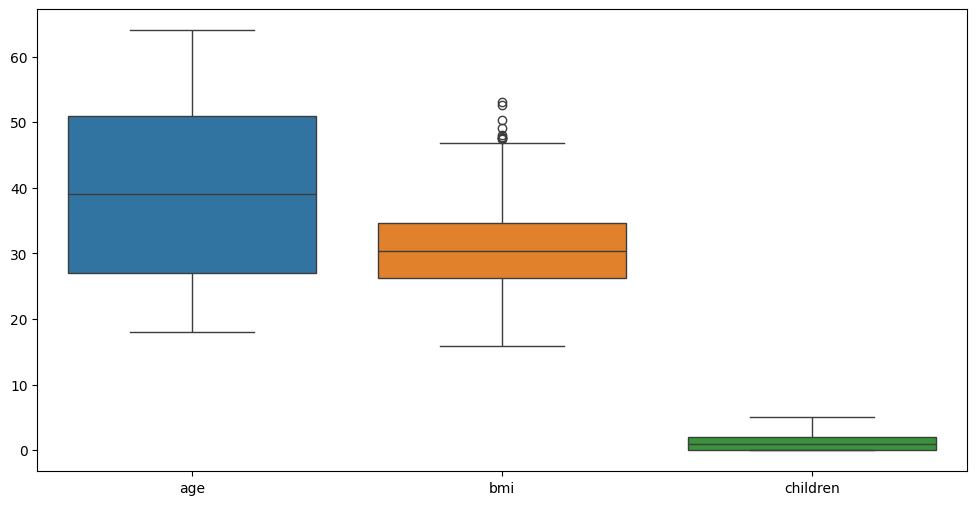

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'bmi', 'children']])
plt.show()

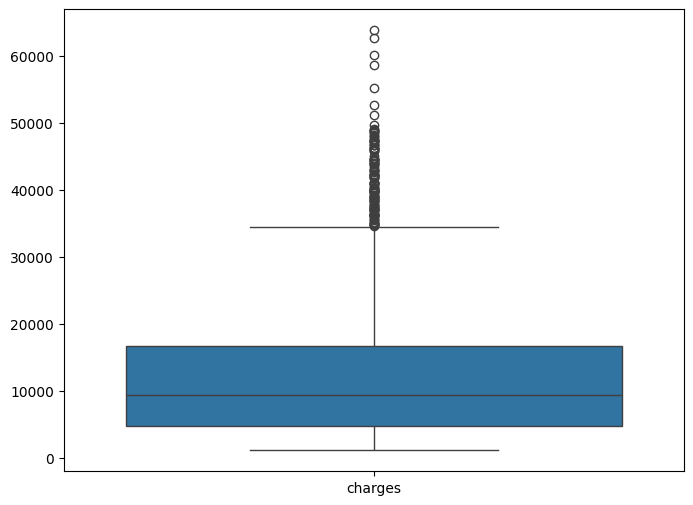

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['charges']])
plt.show()

### IQR method

In [84]:
def find_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\n Outliers for {column}: {len(outliers)} rows")
    return outliers

### Handling Outliers

`charges` 

  Although some values in the `charges` column may appear high, they reflect genuine variations in medical costs due to factors like age, smoking status, and pre-existing conditions. Therefore, this data will be retain these values without modification as they are integral to understanding the dataset.

`bmi`

  Outliers in the `bmi` column (e.g., unusually high BMI values) could skew the analysis. To mitigate this, it be replace outliers in `bmi` with the **median BMI value**.


In [83]:
outliers_bmi = find_outliers_iqr(df,'bmi')
outliers_bmi.head()


 Outliers for bmi: 9 rows


,age,bmi,children,smoker,charges,male,region_northeast,region_northwest,region_southeast,region_southwest
116,58,49.06,0,0,11381.32540,1,0,0,1,0
286,46,48.07,2,0,9432.92530,0,1,0,0,0
401,47,47.52,1,0,8083.91980,1,0,0,1,0
543,54,47.41,0,1,63770.42801,0,0,0,1,0
847,23,50.38,1,0,2438.05520,1,0,0,1,0


In [88]:
median_bmi = df['bmi'].median()

outlier_indices = outliers_bmi.index
df.loc[outlier_indices, 'bmi'] = median_bmi

In [90]:
outliers_bmi = find_outliers_iqr(df,'bmi')


 Outliers for bmi: 0 rows
